##**Weather's Dangerous Impact on Accidents in maryland**





# **Data Preprocessing**

##**Importing Libraries**

In [1]:
#Data Manipulation
import pandas as pd
#Artithmetic Calculations
import numpy as np
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Display all Columns 
pd.pandas.set_option('display.max_columns',None)
#Display all Rows
pd.pandas.set_option('display.max_rows',None)
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")


##**Loading DataSets**

In [2]:
VehicleCrashes_df = pd.read_csv("https://media.githubusercontent.com/media/kwrigh8176/DATA601DATA/main/Maryland_Statewide_Vehicle_Crashes.csv",low_memory=False)

PersonalDetails_df = pd.read_csv("https://media.githubusercontent.com/media/kwrigh8176/DATA601DATA/main/Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized.csv",low_memory=False)

VehicleDetails_df =  pd.read_csv("https://media.githubusercontent.com/media/kwrigh8176/DATA601DATA/main/Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details.csv",low_memory=False)


In [3]:
print(f"Shape of VehicleCrashes_df  : ",VehicleCrashes_df.shape)
print(f"Shape of PersonalDetails_df : ",PersonalDetails_df.shape)
print(f"Shape of VehicleDetails_df  : ",VehicleDetails_df.shape)

Shape of VehicleCrashes_df  :  (742925, 56)
Shape of PersonalDetails_df :  (1664889, 48)
Shape of VehicleDetails_df  :  (1386222, 49)


##These are the three Data sets we will be working which contains Records of the year 2020 and 2021
Filtering the years 2020 and 2021 patterns from all the datasets to understand the pattern of crashes, causes and reasons of crashes

In [4]:
#It takes only those rows which have 2020 and 2021 in column 'YEAR'
#Filtering based on the years 2020 and 2021
VehicleCrashes = VehicleCrashes_df[VehicleCrashes_df['YEAR'].isin([2020,2021])]  

PersonalDetails = PersonalDetails_df[PersonalDetails_df['YEAR'].isin([2020,2021])]

VehicleDetails = VehicleDetails_df[VehicleDetails_df['YEAR'].isin([2020,2021])]

Printing the shape of the datasets after extracting only 2020 and 2021 data

In [5]:
print(f"Shape of VehicleCrashes  : ",VehicleCrashes.shape)
print(f"Shape of PersonalDetails : ",PersonalDetails.shape)
print(f"Shape of VehicleDetails  : ",VehicleDetails.shape)

Shape of VehicleCrashes  :  (171577, 56)
Shape of PersonalDetails :  (372049, 48)
Shape of VehicleDetails  :  (316389, 49)


##Checking for the null values in the datasets of 2020 and 2021

In [6]:
print(VehicleCrashes.isnull().sum())
print("==================================================")
print(PersonalDetails.isnull().sum())

print("==================================================")
print(VehicleDetails.isnull().sum())

YEAR                          0
QUARTER                       0
LIGHT_DESC                11010
LIGHT_CODE                    0
COUNTY_DESC                   5
COUNTY_NO                     5
MUNI_DESC                171577
MUNI_CODE                 34816
JUNCTION_DESC             24547
JUNCTION_CODE             15973
COLLISION_TYPE_DESC           0
COLLISION_TYPE_CODE           0
SURF_COND_DESC            16482
SURF_COND_CODE            15973
LANE_DESC                 40644
LANE_CODE                 40644
RD_COND_DESC              15973
RD_COND_CODE              15973
RD_DIV_DESC               16779
RD_DIV_CODE               15973
FIX_OBJ_DESC              10267
FIX_OBJ_CODE                  0
REPORT_NO                     0
REPORT_TYPE                   0
WEATHER_DESC             129820
WEATHER_CODE                  0
ACC_DATE                      0
ACC_TIME                      0
LOC_CODE                  98385
SIGNAL_FLAG_DESC              0
SIGNAL_FLAG                   0
C_M_ZONE


## Capitalising column names from all datasets

*  After exploring we come to know that,Every Column in all Three Data Sets is in CAPITAL Except 'Quarter' is small in PersonalDetails and VehicleDetails Data Sets. 
*   To simplify and to avoid any case sensitive and syntax issues we will be capitalizing all the columns to capitals
*   So we will Capitalize only Quarter Column

In [7]:
PersonalDetails = PersonalDetails.rename({'Quarter':'QUARTER'},axis = 1)
VehicleDetails = VehicleDetails.rename({'Quarter':'QUARTER'},axis =1)


## Checking Common Columns

In [8]:
def VehicleCrasheandPersonalDetails():
  print('Common Columns of VehicleCrashes  and PersonalDetails Data Set: \n')
  for i in VehicleCrashes.columns:
    for j in PersonalDetails.columns:
            if i == j:
                print("\t",i)
                

def VehicleCrashesandVehicleDetails():
  print("\nCommon Columns of  VehicleCrashes and VehicleDetails Data Set: \n")
  for i in VehicleCrashes.columns:
    for j in VehicleDetails.columns:
        if i == j:
            print("\t",i)
            

def PersonalDetailsandVehicleDetails():
  print("\nCommon Columns of PersonalDetails and VehicleDetails Data Set: \n")
  for i in VehicleDetails.columns:
          for j in PersonalDetails.columns:
              if i == j:
                  print("\t",i)
                  
            
VehicleCrasheandPersonalDetails()
VehicleCrashesandVehicleDetails()
PersonalDetailsandVehicleDetails()


Common Columns of VehicleCrashes  and PersonalDetails Data Set: 

	 YEAR
	 QUARTER
	 REPORT_NO

Common Columns of  VehicleCrashes and VehicleDetails Data Set: 

	 YEAR
	 QUARTER
	 REPORT_NO

Common Columns of PersonalDetails and VehicleDetails Data Set: 

	 MOVEMENT_DESC
	 MOVEMENT_CODE
	 REPORT_NO
	 VEHICLE_ID
	 YEAR
	 QUARTER


### Getting the Overview of Each Columns from every Data Sets, So that we can perform our Data Analysis Effectively

In [9]:
print("(VehicleCrashes DataSet)\n",VehicleCrashes.columns)
print("===============================================================================\n")
print("(PersonalDetails DataSet)\n",PersonalDetails.columns)
print("===============================================================================\n")
print("(VehicleDetails DataSet)\n",VehicleDetails.columns)

(VehicleCrashes DataSet)
 Index(['YEAR', 'QUARTER', 'LIGHT_DESC', 'LIGHT_CODE', 'COUNTY_DESC',
       'COUNTY_NO', 'MUNI_DESC', 'MUNI_CODE', 'JUNCTION_DESC', 'JUNCTION_CODE',
       'COLLISION_TYPE_DESC', 'COLLISION_TYPE_CODE', 'SURF_COND_DESC',
       'SURF_COND_CODE', 'LANE_DESC', 'LANE_CODE', 'RD_COND_DESC',
       'RD_COND_CODE', 'RD_DIV_DESC', 'RD_DIV_CODE', 'FIX_OBJ_DESC',
       'FIX_OBJ_CODE', 'REPORT_NO', 'REPORT_TYPE', 'WEATHER_DESC',
       'WEATHER_CODE', 'ACC_DATE', 'ACC_TIME', 'LOC_CODE', 'SIGNAL_FLAG_DESC',
       'SIGNAL_FLAG', 'C_M_ZONE_FLAG', 'AGENCY_CODE', 'AREA_CODE',
       'HARM_EVENT_DESC1', 'HARM_EVENT_CODE1', 'HARM_EVENT_DESC2',
       'HARM_EVENT_CODE2', 'RTE_NO', 'ROUTE_TYPE_CODE', 'RTE_SUFFIX',
       'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC', 'LOGMILE_DIR_FLAG',
       'MAINROAD_NAME', 'DISTANCE', 'FEET_MILES_FLAG_DESC', 'FEET_MILES_FLAG',
       'DISTANCE_DIR_FLAG', 'REFERENCE_NO', 'REFERENCE_TYPE_CODE',
       'REFERENCE_SUFFIX', 'REFERENCE_ROAD_NAME', 'LATITUD

Adding extra column ACCIDENT_DATETIME which will be the combination of ACC_DATE and ACC_TIME
We could use this column in the future to get the overview of Accident happened at what Date,year,month, Time

In [10]:
VehicleCrashes['ACCIDENT_DATETIME'] = pd.to_datetime(VehicleCrashes.ACC_DATE.astype(str)+' '+VehicleCrashes.ACC_TIME.astype(str))
VehicleCrashes.head(2)

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,SURF_COND_CODE,LANE_DESC,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_DESC,RD_DIV_CODE,FIX_OBJ_DESC,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,ACC_DATE,ACC_TIME,LOC_CODE,SIGNAL_FLAG_DESC,SIGNAL_FLAG,C_M_ZONE_FLAG,AGENCY_CODE,AREA_CODE,HARM_EVENT_DESC1,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,RTE_SUFFIX,LOG_MILE,LOGMILE_DIR_FLAG_DESC,LOGMILE_DIR_FLAG,MAINROAD_NAME,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION,ACCIDENT_DATETIME
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE58770052,Property Damage Crash,Not Applicable,0.00,20200618,15:15:00,NaN,No,N,N,BACOPD,UNK,Parked Vehicle,2.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285),2020-06-18 15:15:00
1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,Other,88,Dry,2.0,Left Turn Lane,2.0,No Defects,1.0,One-way Trafficway,2.0,Other Pole,10.0,ADJ984001J,Injury Crash,NaN,7.01,20200430,06:39:00,1003,Yes,Y,N,BALTIMORE,UNK,Other Vehicle,1.0,Other Vehicle,1.0,NaN,NaN,NaN,0.0,NaN,NaN,CHARLES STREET,2.0,Miles,M,N,NaN,NaN,NaN,NORTH AVE,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431),2020-04-30 06:39:00


# **Merging**

####Merging of PersonalDetails and VehicleDetails datasets of years 2020 and 2021

In [11]:
#Merging Vehicle details and Personal details datasets
Vehicle_Personal_Details = pd.merge(VehicleDetails, PersonalDetails, how = 'outer', on = ['MOVEMENT_CODE', 'MOVEMENT_DESC', 'QUARTER', 'REPORT_NO','VEHICLE_ID', 'YEAR'])
Vehicle_Personal_Details.shape

(688438, 91)

####Merging all three datasets: Vehicle Crashes, Vehicle Details and Personal Details to understand the relations and patterns of the data

In [12]:
Super_Merge = pd.merge(Vehicle_Personal_Details, VehicleCrashes, how = 'outer', on = ['QUARTER', 'REPORT_NO', 'YEAR'])
print(f"Shape of Merged data  : ", Super_Merge.shape)
print("================================================")
Super_Merge.head(4)

Shape of Merged data  :  (688442, 145)


,HARM_EVENT_DESC,HARM_EVENT_CODE,CONTI_DIRECTION_DESC,CONTI_DIRECTION_CODE,DAMAGE_DESC,DAMAGE_CODE,MOVEMENT_DESC,MOVEMENT_CODE,VIN_NO,REPORT_NO,CV_BODY_TYPE_DESC,CV_BODY_TYPE_CODE,VEH_YEAR,VEH_MAKE,VEH_MODEL,COMMERCIAL_FLAG_DESC,COMMERCIAL_FLAG,HZM_NUM,TOWED_AWAY_FLAG_DESC,TOWED_AWAY_FLAG,NUM_AXLES,GVW_DESC,GVW_CODE,GOING_DIRECTION_DESC,GOING_DIRECTION_CODE,BODY_TYPE_DESC,BODY_TYPE_CODE,DRIVERLESS_FLAG_DESC,DRIVERLESS_FLAG,FIRE_FLAG_DESC,FIRE_FLAG,PARKED_FLAG_DESC,PARKED_FLAG,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,HIT_AND_RUN_FLAG,HAZMAT_SPILL_FLAG_DESC,HAZMAT_SPILL_FLAG,VEHICLE_ID,TOWED_VEHICLE_CONFIG_DESC,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN_DESC,AREA_DAMAGED_CODE_MAIN,YEAR,QUARTER,SEX_DESC,SEX_CODE,CONDITION_DESC,CONDITION_CODE,INJ_SEVER_DESC,INJ_SEVER_CODE,OCC_SEAT_POS_DESC,OCC_SEAT_POS_CODE,PED_VISIBLE_DESC,PED_VISIBLE_CODE,PED_OBEY_DESC,PED_OBEY_CODE,PED_TYPE_DESC,PED_TYPE_CODE,PED_LOCATION_CODE,PERSON_TYPE_DESC,PERSON_TYPE,ALCOHOL_TEST_DESC,ALCOHOL_TEST_CODE,ALCOHOL_TESTTYPE_DESC,ALCOHOL_TESTTYPE_CODE,DRUG_TEST_DESC,DRUG_TEST_CODE,DRUG_TESTRESULT_DESC,DRUG_TESTRESULT_CODE,BAC_CODE,FAULT_FLAG_DESC,FAULT_FLAG,EQUIP_PROB_DESC,EQUIP_PROB_CODE,SAF_EQUIP_DESC,SAF_EQUIP_CODE,EJECT_DESC,EJECT_CODE,DATE_OF_BIRTH,PERSON_ID,LICENSE_STATE_CODE,CLASS,CDL_FLAG_DESC,CDL_FLAG,EMS_UNIT_LABEL,AIRBAG_DEPLOYED,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,SURF_COND_CODE,LANE_DESC,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_DESC,RD_DIV_CODE,FIX_OBJ_DESC,FIX_OBJ_CODE,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,ACC_DATE,ACC_TIME,LOC_CODE,SIGNAL_FLAG_DESC,SIGNAL_FLAG,C_M_ZONE_FLAG,AGENCY_CODE,AREA_CODE,HARM_EVENT_DESC1,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,RTE_SUFFIX,LOG_MILE,LOGMILE_DIR_FLAG_DESC,LOGMILE_DIR_FLAG,MAINROAD_NAME,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION,ACCIDENT_DATETIME
0,Other Vehicle,1.0,North,N,Unknown,99.0,Unknown,99.0,NaN,AE5057004X,NaN,NaN,NaN,UNKNOWN,UNKNOWN,No,N,NaN,No,N,NaN,NaN,NaN,North,N,NaN,NaN,NaN,U,No,N,No,N,25.0,Yes,Y,NaN,NaN,47e2531d-8c69-470c-9198-502a46c7639e,Unknown,99.0,11.0,10.0,11.0,12.0,Eleven o'clock,11.0,2020,Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daylight,1.0,Baltimore,3.0,NaN,0.0,Non Intersection,1.00,Other,88.0,Dry,2.0,Right Turn Lane,1.0,No Defects,1.0,"Two-way, Not Divided",1.0,Not Applicable,0.0,Property Damage Crash,Not Applicable,0.00,20200528.0,11:40:00,NaN,No,N,N,BACOPD,UNK,Other Vehicle,1.0,Not Applicable,0.0,3073.0,CO,NaN,0.06,North,N,DOLORES AVE,300.0,Feet,F,N,3074.0,CO,NaN,BREWSTER ST,39.245577,-76.702305,POINT (-76.702304848438 39.245576553452),2020-05-28 11:40:00
1,Not Applicable,0.0,NaN,NaN,Functional,3.0,Parked,10.0,1GNEL19X95B120644,AE5057004X,NaN,NaN,2005.0,CHEVY,ASTRO,No,N,NaN,No,N,NaN,NaN,NaN,NaN,NaN,Passenger Car,2.0,Yes,Y,No,N,Yes,Y,25.0,No,N,NaN,NaN,546908c6-3c1d-4433-aff1-f613347f3aad,Not Applicable,0.0,10.0,7.0,8.0,10.0,Eight o'clock,8.0,2020,Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daylight,1.0,Baltimore,3.0,NaN,0.0,Non Intersection,1.00,Other,88.0,Dry,2.0,Right Turn Lane,1.0,No Defects,1.0,"Two-way, Not Divided",1.0,Not Applicable,0.0,Property Damage Crash,Not Applicable,0.00,20200528.0,11:40:00,NaN,No,N,N,BACOPD,UNK,Other Vehicle,1.0,Not Applicable,0.0,3073.0,CO,NaN,0.06,North,N,DOLORES AVE,300.0,Feet,F,N,3074.0,CO,NaN,BREWSTER ST,39.245577,-76.702305,POINT (-76.702304848438 39.245576553452),2020-05-28 11:40:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AE5057004X,NaN,NaN,NaN,NaN,NaN,NaN,Na

# **Data Cleaning**

##Step 1: Removing of Redundant columns from the merged datasets of 2020 and 2021

In [13]:
## Removing the Redundant Columns and Selecting the columns which would be using  as per our story Analysis.

Super_Merge_df = Super_Merge[['REPORT_NO','QUARTER','ACCIDENT_DATETIME','LOCATION','LATITUDE','LONGITUDE','MAINROAD_NAME','AGENCY_CODE','AREA_CODE','REPORT_TYPE','WEATHER_DESC','WEATHER_CODE','RD_DIV_DESC','RD_DIV_CODE','LANE_DESC','LANE_CODE','COLLISION_TYPE_DESC','COLLISION_TYPE_CODE','JUNCTION_DESC','JUNCTION_CODE','COUNTY_DESC','COUNTY_NO','LIGHT_DESC','LIGHT_CODE','DATE_OF_BIRTH','SEX_DESC','SEX_CODE','YEAR','AREA_DAMAGED_CODE_MAIN_DESC','AREA_DAMAGED_CODE_MAIN','SPEED_LIMIT','VEH_YEAR','VEH_MAKE','VEH_MODEL','PERSON_TYPE_DESC','SAF_EQUIP_DESC','LICENSE_STATE_CODE','EJECT_DESC','EQUIP_PROB_DESC','DRUG_TESTRESULT_DESC','DAMAGE_DESC','CONTI_DIRECTION_DESC','INJ_SEVER_CODE']]

print(f"Shape of Merged datasets with relevant data", Super_Merge_df.shape)
print("==================================================================")
#Super_Merge_df.head()

Shape of Merged datasets with relevant data (688442, 43)


## Step 2: Checking for Duplicate data and dropping the duplicate data from the merged datasets

In [14]:
## Checking the Count Of Duplicate Values in the above data set

Super_Merge_df.duplicated().value_counts()

False    687375
True       1067
dtype: int64

In [15]:
## Dropping the Duplicate records
Super_Merge_df = Super_Merge_df.drop_duplicates()

In [16]:
# After Removing the duplicates
Super_Merge_df.duplicated().value_counts()

False    687375
dtype: int64

##Step 3: Handling missing values for few columns from the merged datasets

In [17]:
## We will try to look it into the column 'DRUG_TESTRESULT_DESC'
## There are many Nan Values

Super_Merge_df.DRUG_TESTRESULT_DESC.value_counts(dropna = False)

NaN               685414
Unknown             1063
Not Applicable       579
Positive             221
Negative              98
Name: DRUG_TESTRESULT_DESC, dtype: int64

In [18]:
#### Filling of missing values for Drug test results 
#### Nan with Not reported
Super_Merge_df['DRUG_TESTRESULT_DESC'] = Super_Merge_df['DRUG_TESTRESULT_DESC'].fillna("Not Reported")
#### Now Nan values will be replaced

Super_Merge_df.DRUG_TESTRESULT_DESC.value_counts(dropna = False)

Not Reported      685414
Unknown             1063
Not Applicable       579
Positive             221
Negative              98
Name: DRUG_TESTRESULT_DESC, dtype: int64

In [19]:
### Filling of missing values for light conditions 
#### Nan with Not mentioned
Super_Merge_df['LIGHT_DESC'] = Super_Merge_df['LIGHT_DESC'].fillna("Not mentioned")
#### Now Nan values will be replaced

Super_Merge_df.LIGHT_DESC.value_counts(dropna = False)

Daylight          429367
Dark Lights On    157334
Not mentioned      41344
Dark No Lights     37482
Not Applicable     11923
Unknown             7848
Other               2077
Name: LIGHT_DESC, dtype: int64

In [20]:
##  'VEH_YEAR'
#### Nan Values are replaced with o
Super_Merge_df['VEH_YEAR'] = Super_Merge_df['VEH_YEAR'].fillna(0)

Super_Merge_df.VEH_YEAR.value_counts(dropna = False).head()

0.0       390501
2016.0     22053
2017.0     21183
2015.0     20748
2019.0     18827
Name: VEH_YEAR, dtype: int64

# **EDA (Exploratory Data Analysis)**


Printing the first five rows of merged and cleaned datasets

In [21]:
#Getting the Top 5 records to explore the data set
Super_Merge_df.head()

,REPORT_NO,QUARTER,ACCIDENT_DATETIME,LOCATION,LATITUDE,LONGITUDE,MAINROAD_NAME,AGENCY_CODE,AREA_CODE,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,RD_DIV_DESC,RD_DIV_CODE,LANE_DESC,LANE_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,JUNCTION_DESC,JUNCTION_CODE,COUNTY_DESC,COUNTY_NO,LIGHT_DESC,LIGHT_CODE,DATE_OF_BIRTH,SEX_DESC,SEX_CODE,YEAR,AREA_DAMAGED_CODE_MAIN_DESC,AREA_DAMAGED_CODE_MAIN,SPEED_LIMIT,VEH_YEAR,VEH_MAKE,VEH_MODEL,PERSON_TYPE_DESC,SAF_EQUIP_DESC,LICENSE_STATE_CODE,EJECT_DESC,EQUIP_PROB_DESC,DRUG_TESTRESULT_DESC,DAMAGE_DESC,CONTI_DIRECTION_DESC,INJ_SEVER_CODE
0,AE5057004X,Q2,2020-05-28 11:40:00,POINT (-76.702304848438 39.245576553452),39.245577,-76.702305,DOLORES AVE,BACOPD,UNK,Property Damage Crash,Not Applicable,0.00,"Two-way, Not Divided",1.0,Right Turn Lane,1.0,Other,88.0,Non Intersection,1.00,Baltimore,3.0,Daylight,1.0,NaN,NaN,NaN,2020,Eleven o'clock,11.0,25.0,0.0,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,Not Reported,Unknown,North,NaN
1,AE5057004X,Q2,2020-05-28 11:40:00,POINT (-76.702304848438 39.245576553452),39.245577,-76.702305,DOLORES AVE,BACOPD,UNK,Property Damage Crash,Not Applicable,0.00,"Two-way, Not Divided",1.0,Right Turn Lane,1.0,Other,88.0,Non Intersection,1.00,Baltimore,3.0,Daylight,1.0,NaN,NaN,NaN,2020,Eight o'clock,8.0,25.0,2005.0,CHEVY,ASTRO,NaN,NaN,NaN,NaN,NaN,Not Reported,Functional,NaN,NaN
2,AE5057004X,Q2,2020-05-28 11:40:00,POINT (-76.702304848438 39.245576553452),39.245577,-76.702305,DOLORES AVE,BACOPD,UNK,Property Damage Crash,Not Applicable,0.00,"Two-way, Not Divided",1.0,Right Turn Lane,1.0,Other,88.0,Non Intersection,1.00,Baltimore,3.0,Daylight,1.0,NaN,NaN,NaN,2020,NaN,NaN,NaN,0.0,NaN,NaN,Driver,Unknown,NaN,Unknown,Unknown,Not Reported,NaN,NaN,1.0
3,MSP7221001P,Q2,2020-06-05 12:22:00,POINT (-76.883443983333 38.9891389),38.989139,-76.883444,CAPITAL BELTWAY,MSP,UNK,Injury Crash,NaN,6.01,"Two-way, Divided, Positive Median Barrier",4.0,Shoulder Area,5.0,Same Direction Rear End,3.0,NaN,5.01,Prince George's,16.0,Daylight,1.0,NaN,NaN,NaN,2020,Twelve o'clock,12.0,55.0,2018.0,TOYOTA,CAMRY,NaN,NaN,NaN,NaN,NaN,Not Reported,Superficial,North,NaN
4,MSP7221001P,Q2,2020-06-05 12:22:00,POINT (-76.883443983333 38.9891389),38.989139,-76.883444,CAPITAL BELTWAY,MSP,UNK,Injury Crash,NaN,6.01,"Two-way, Divided, Positive Median Barrier",4.0,Shoulder Area,5.0,Same Direction Rear End,3.0,NaN,5.01,Prince George's,16.0,Daylight,1.0,NaN,NaN,NaN,2020,Twelve o'clock,12.0,55.0,2017.0,TOYOTA,RAV 4,NaN,NaN,NaN,NaN,NaN,Not Reported,Disabling,North,NaN


In [22]:
## Concise summary of a DataFrame.
##  info related to datatypes, null value etc
Super_Merge_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687375 entries, 0 to 688441
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   REPORT_NO                    687375 non-null  object        
 1   QUARTER                      687375 non-null  object        
 2   ACCIDENT_DATETIME            687369 non-null  datetime64[ns]
 3   LOCATION                     687369 non-null  object        
 4   LATITUDE                     687369 non-null  float64       
 5   LONGITUDE                    687369 non-null  float64       
 6   MAINROAD_NAME                633555 non-null  object        
 7   AGENCY_CODE                  687369 non-null  object        
 8   AREA_CODE                    687369 non-null  object        
 9   REPORT_TYPE                  687369 non-null  object        
 10  WEATHER_DESC                 158592 non-null  object        
 11  WEATHER_CODE              

#### Created datasets to analyze data seperately for years 2020 and 2021

In [23]:
year_2020 = Super_Merge_df[Super_Merge_df.YEAR == 2020]
year_2021 = Super_Merge_df[Super_Merge_df.YEAR == 2021]

**Heat map for null values**

Vizualizing all the null values after merging and data cleaning, to check the reliability of columns.

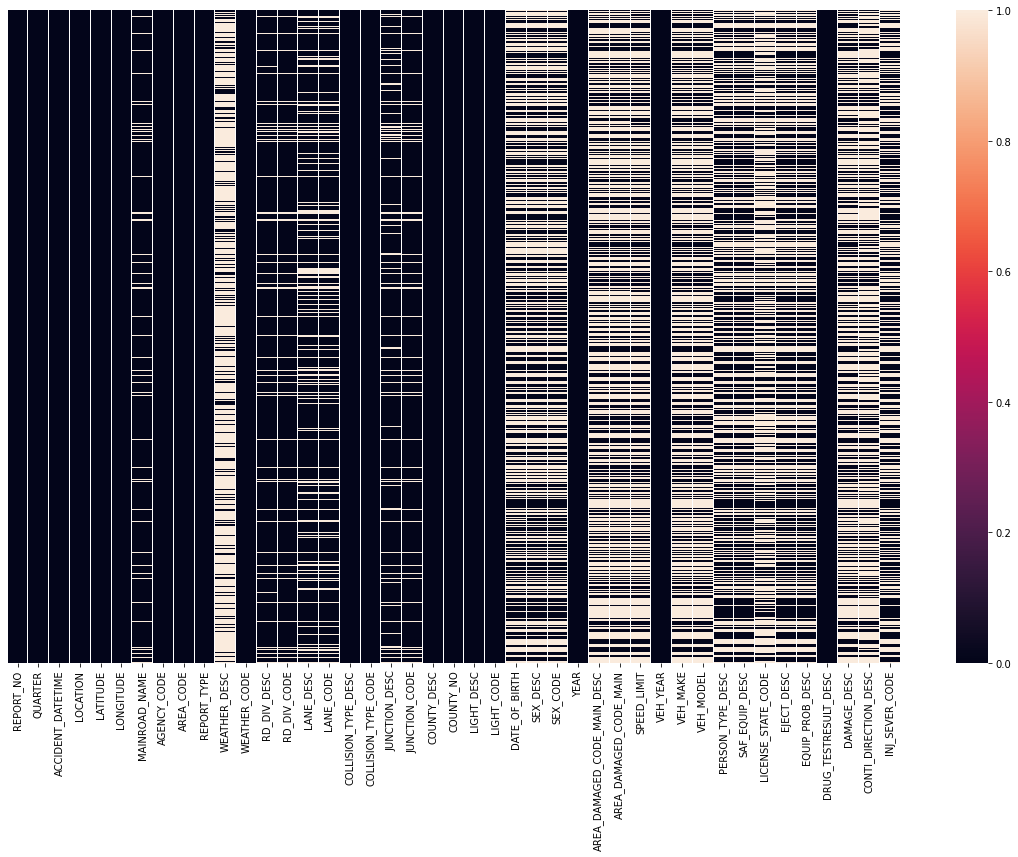

In [24]:
#Some columns are having missing values
#color with blacks are having least numbr of null values and white color with more null values
plt.figure(figsize=(20,12))
sns.heatmap(Super_Merge_df.isnull(), yticklabels=False)

**From the trends in data, 2020 and 2021 years had Lowest number of crashes. So, we will be exploring more from the 2020 and 2021 data**
**Note: Only for this we have used VehicleCrashes Dataset. BUT for our entire Project we will be using all the three data sets**

From the pattern, 2020 and 2021 recorded less number of crashes

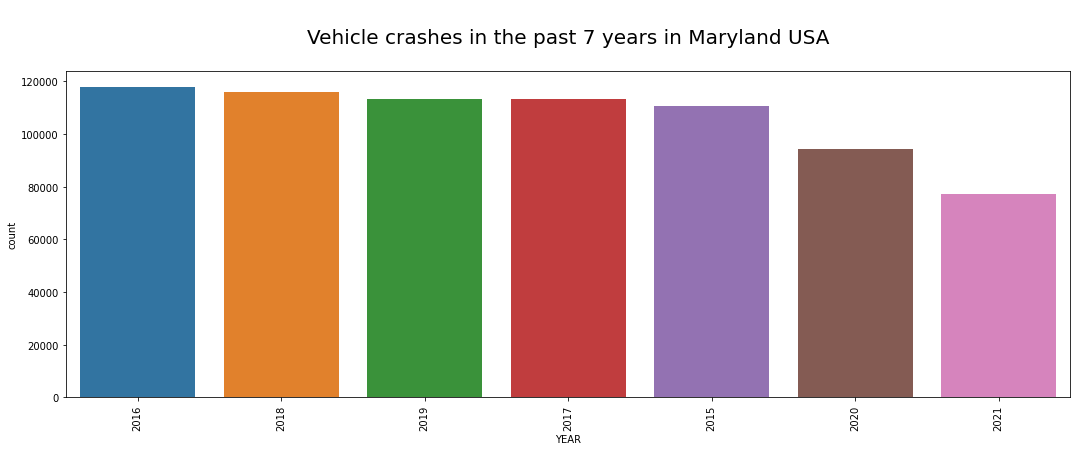

In [25]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=VehicleCrashes_df,x='YEAR',order = VehicleCrashes_df['YEAR'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('\nVehicle crashes in the past 7 years in Maryland USA\n', fontsize=20);
plt.show()

# **In sights:**




##Location Analysis

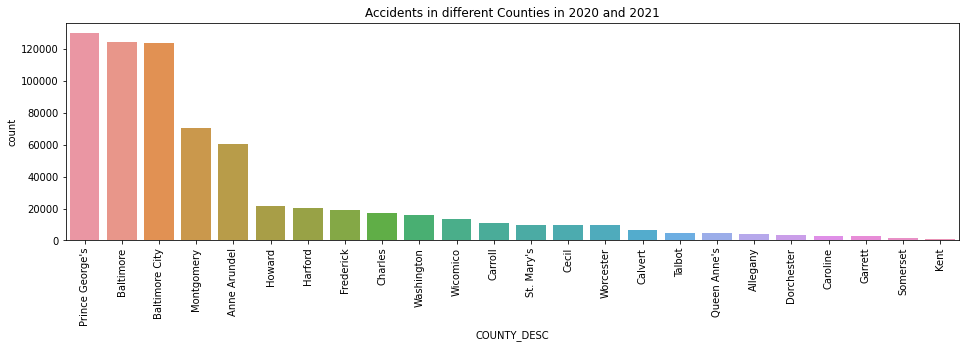

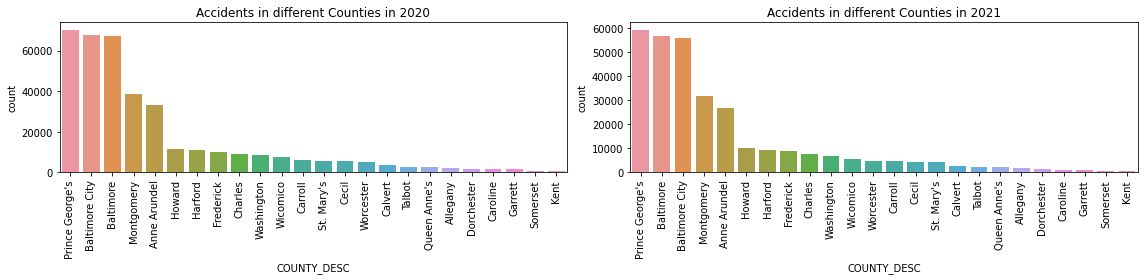

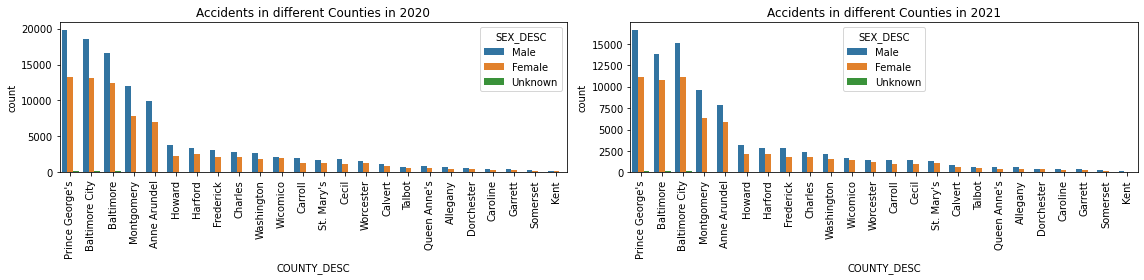

In [26]:

#1) Accidents happened in the year '2020 and 2021'
plt.figure(figsize=(16,4))
ax = sns.countplot(data=Super_Merge_df,x='COUNTY_DESC',order = Super_Merge_df['COUNTY_DESC'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Accidents in different Counties in 2020 and 2021')
plt.show()

#2)  Accidents happened in the year '2020' and  Accidents happened in the year '2021' --'SEPARATELY'
fig, ax =plt.subplots(1,2,tight_layout=True,figsize=(16,4))
ax1 = sns.countplot(data=year_2020,x='COUNTY_DESC', ax=ax[0],order = year_2020['COUNTY_DESC'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Accidents in different Counties in 2020')

ax2 = sns.countplot(data=year_2021,x='COUNTY_DESC', ax=ax[1],order = year_2021['COUNTY_DESC'].value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Accidents in different Counties in 2021')

fig.show()

#3) Accidents happened in the year '2020' and  Accidents happened in the year '2021' --'SEPARATELY'  -- Based on 'SEX'
fig, ax =plt.subplots(1,2,tight_layout=True,figsize=(16,4))
ax1 = sns.countplot(data=year_2020,x='COUNTY_DESC', hue='SEX_DESC',ax=ax[0],order = year_2020['COUNTY_DESC'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Accidents in different Counties in 2020')

ax2 = sns.countplot(data=year_2021,x='COUNTY_DESC', hue='SEX_DESC', ax=ax[1],order = year_2021['COUNTY_DESC'].value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Accidents in different Counties in 2021')

fig.show()

According to Maryland demographics even though Montgomery county is the highest populous county in maryland in terms of crashes it is ranked 4th. Where as Prince Georgias and Kent are ranked as highest and lowest number of accident crashes respectively. Kent is the lowest populus county in the Maryland, it might be the reason for less number of accidents in that county
Reference: https://www.maryland-demographics.com/counties_by_population

Also we can notice that most of the accidents are happened with Males in almost every counties.

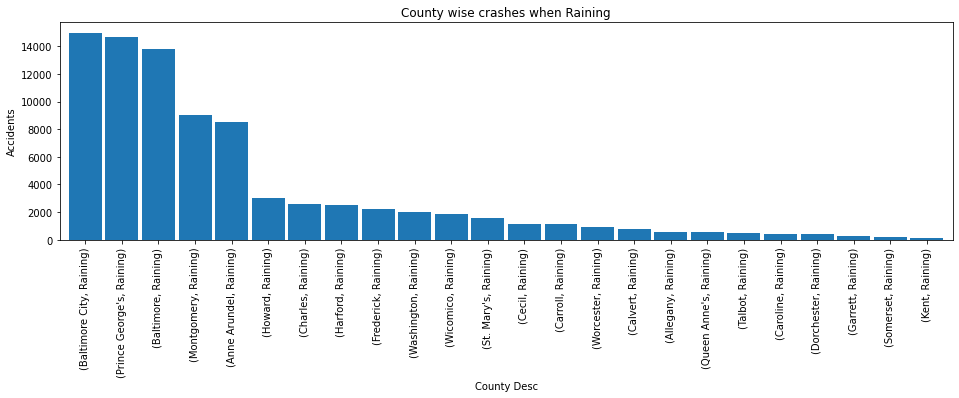

In [27]:
plt.figure(figsize=(16,4))
new_var = Super_Merge_df.groupby(['COUNTY_DESC','WEATHER_DESC']).filter(lambda x: (x["WEATHER_DESC"] == "Raining").any())
countywise_rain = new_var.groupby(['COUNTY_DESC','WEATHER_DESC']).size().sort_values(ascending = False)
countywise_rain
countywise_rain.plot(kind = "bar",width=0.9, xlabel = 'County Desc', ylabel = 'Accidents',title = "County wise crashes when Raining")

plt.show()

##Minimum speed limit recorded for crashes is '0'; maximum is '75' from years 2020 and 2021

In [28]:
#Understanding the patterns of minimum, maximum, standard deviation and mean of the data
Super_Merge_df.describe()

,LATITUDE,LONGITUDE,WEATHER_CODE,RD_DIV_CODE,LANE_CODE,COLLISION_TYPE_CODE,JUNCTION_CODE,COUNTY_NO,LIGHT_CODE,YEAR,AREA_DAMAGED_CODE_MAIN,SPEED_LIMIT,VEH_YEAR,INJ_SEVER_CODE
count,687369.000000,687369.000000,687369.000000,633559.000000,546688.000000,687369.000000,633559.000000,687351.000000,687369.000000,687375.000000,313779.000000,316330.000000,687375.000000,371041.000000
mean,39.137282,-76.735715,6.017284,4.742219,1.525184,20.594782,2.694113,12.995577,3.300926,2020.454087,12.722397,33.358439,869.682929,1.274385
std,0.310405,0.463484,8.829202,13.935665,0.818516,30.206445,10.057648,7.879731,11.418491,0.497888,19.380157,16.140948,1001.347143,0.654720
min,37.000000,-79.989756,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2020.000000,1.000000,0.000000,0.000000,1.000000
25%,38.968636,-76.929862,6.010000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,2020.000000,6.000000,25.000000,0.000000,1.000000
50%,39.219000,-76.707674,6.010000,3.000000,1.000000,8.000000,1.000000,15.000000,1.000000,2020.000000,11.000000,35.000000,0.000000,1.000000
75%,39.339528,-76.571791,6.010000,4.000000,2.000000,17.000000,2.000000,18.000000,3.000000,2021.000000,12.000000,45.000000,2011.000000,1.000000
max,39.994802,-75.000747,99.000000,99.000000,12.000000,99.000000,99.000000,24.000000,99.000000,2021.000000,99.000000,75.000000,9999.000000,5.000000


##Crashes Distribution on weather in years 2020 and 2021:
"Raining" is the weather that recorded many accidents. while the lowest is recorded in "Blow sand soil, dirt"

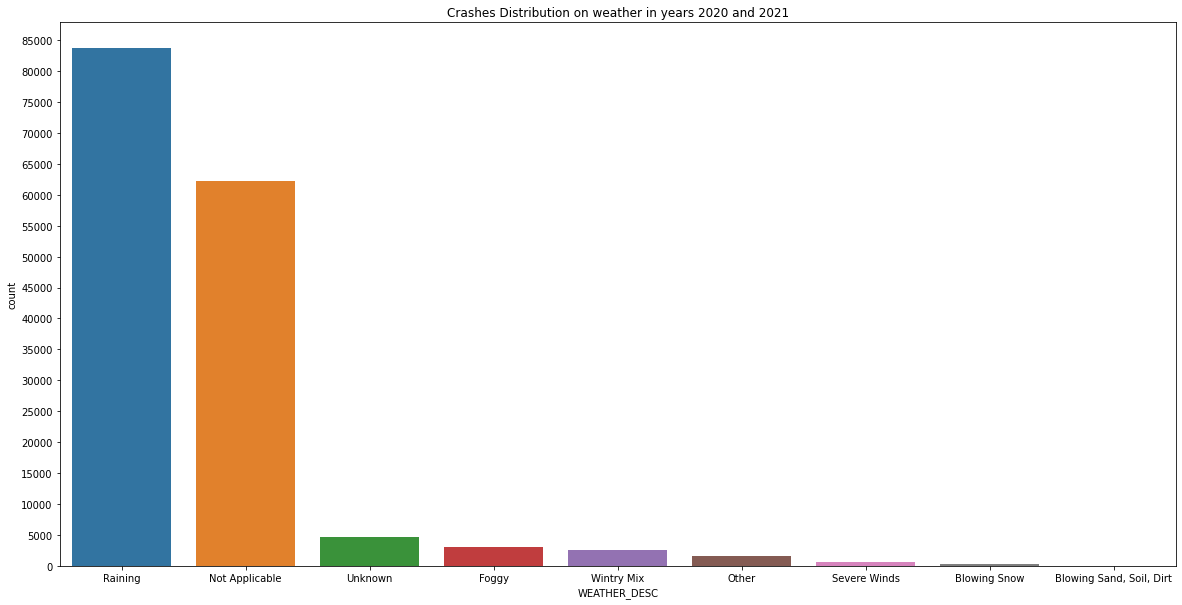

In [29]:
#Crashes Distribution on weather in years 2020 and 2021
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.countplot(Super_Merge_df['WEATHER_DESC'],ax=ax,order=Super_Merge_df['WEATHER_DESC'].value_counts().index)
plt.yticks(np.arange(0, max(Super_Merge_df['WEATHER_DESC'].value_counts().values)+5000, 5000))
ax.set_title('Crashes Distribution on weather in years 2020 and 2021')
plt.show()

##Number of accidents occuried at various counties due to weather conditions

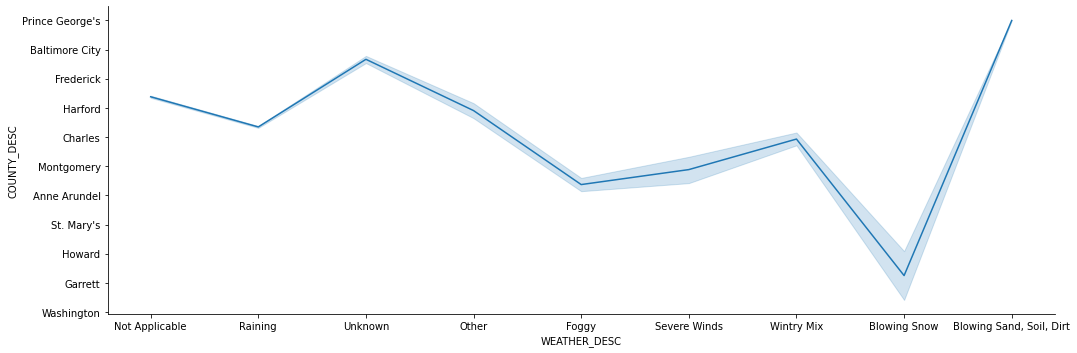

In [30]:
#relational plot for County and weather conditions
dz = sns.relplot(x="WEATHER_DESC", y="COUNTY_DESC",  kind="line",height = 5, aspect = 3, data=Super_Merge_df)

## Quarterly Analysis of Accidents in Rainy Weather

<Figure size 432x288 with 0 Axes>

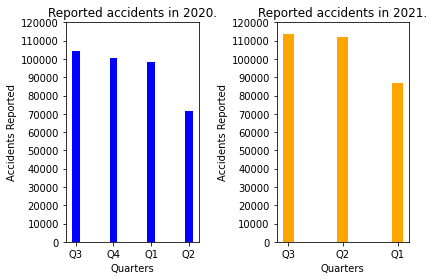

In [31]:
#categorical variables in each quarters for the year 2020 and 2021

year_2020_quarter = year_2020.QUARTER.value_counts()
year_2021_quarter = year_2021.QUARTER.value_counts()





#1,2,tight_layout=True,figsize=(18,6)
fig  = plt.figure()
fig2 = plt.figure()

plt.subplot(1,2,1)
plt.bar(year_2020_quarter.index, year_2020_quarter.values, width=0.2, color='b', align='center')

plt.title("Reported accidents in 2020.")
plt.yticks(np.arange(0, max(year_2021_quarter.values)+10000, 10000))
plt.xlabel('Quarters')
plt.ylabel('Accidents Reported')

plt.subplot(1,2,2)
plt.bar(year_2021_quarter.index, year_2021_quarter.values, width=-0.2, color='orange', align='center')
plt.title("Reported accidents in 2021.")
plt.yticks(np.arange(0, max(year_2021_quarter.values)+10000, 10000))
plt.xlabel('Quarters')
plt.ylabel('Accidents Reported')

plt.tight_layout()
plt.show()

#Q1 of 2021 had way less crashes than the other two quarters
#Way less crashes in Q2 of 2020 than the other quarters

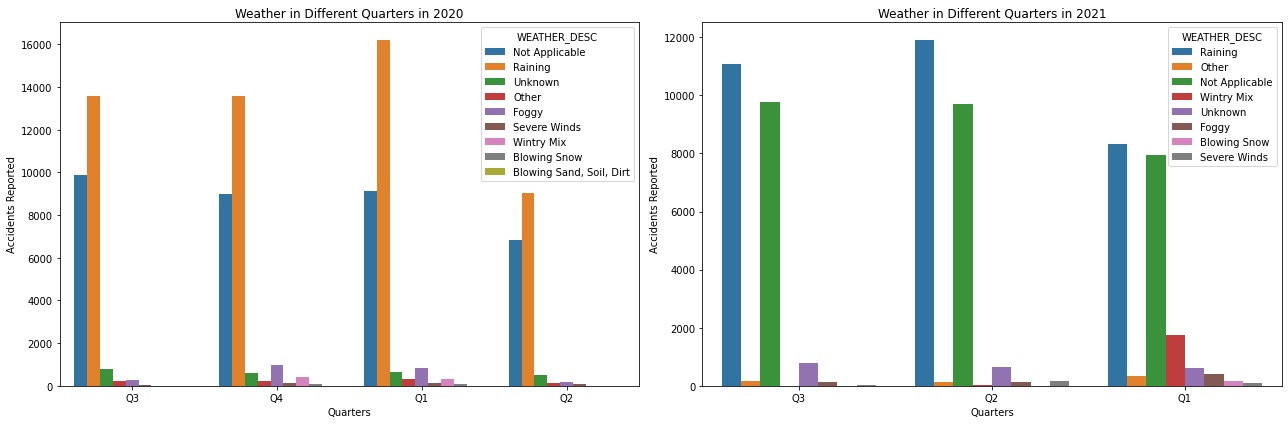

In [32]:
#categorical variables in each quarters for the year 2020 and 2021

fig, ax = plt.subplots(1,2,tight_layout=True,figsize=(18,6))

ax1 = sns.countplot(data=year_2020,x='QUARTER', hue='WEATHER_DESC',ax=ax[0],order = year_2020['QUARTER'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_title('Weather in Different Quarters in 2020')
ax1.legend(loc = 'upper right', title = 'WEATHER_DESC' )

ax1.set_xlabel('Quarters')
ax1.set_ylabel('Accidents Reported')

ax2 = sns.countplot(data=year_2021,x='QUARTER', hue='WEATHER_DESC', ax=ax[1],order = year_2021['QUARTER'].value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_title('Weather in Different Quarters in 2021')
ax2.set_xlabel('Quarters')
ax2.set_ylabel('Accidents Reported')


fig.show()

Note how much higher the Q1 2020 rainfall accidents reported are compared to the Q3 and Q4 

Q1 2020 had less reports, but the amount of reports based on rainfall were much higher than the other quarters (almost a difference of 2000 compared to Q3/Q4 and 7000 compared to Q2)

In [33]:
#2020

new_var = year_2020.groupby(['QUARTER','WEATHER_DESC']).filter(lambda x: (x["WEATHER_DESC"] == "Raining").any())
year_2020_weather_quarter = new_var.groupby(['QUARTER','WEATHER_DESC']).size().sort_values(ascending = False)
year_2020_weather_quarter

QUARTER  WEATHER_DESC
Q1       Raining         16223
Q3       Raining         13582
Q4       Raining         13562
Q2       Raining          9033
dtype: int64

In [34]:
#2021

new_var = year_2021.groupby(['QUARTER','WEATHER_DESC']).filter(lambda x: (x["WEATHER_DESC"] == "Raining").any())
year_2021_weather_quarter = new_var.groupby(['QUARTER','WEATHER_DESC']).size().sort_values(ascending = False)

year_2021_weather_quarter

#2000 more rain accidents in Q2 2021 than Q2 2020

QUARTER  WEATHER_DESC
Q2       Raining         11915
Q3       Raining         11072
Q1       Raining          8312
dtype: int64

 Fatalities in the year when the condition is "Raining" in each quarters for the year 2020

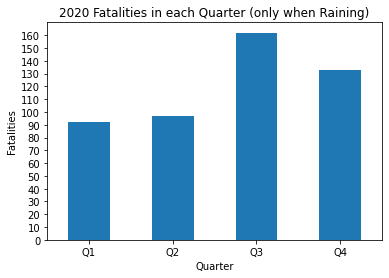

In [35]:
#2020

new_var = year_2020.groupby(['QUARTER','INJ_SEVER_CODE']).filter(lambda x: (x["WEATHER_DESC"] == "Raining").any() and (x["INJ_SEVER_CODE"] == 5.0).any())
year_2020_weather_quarter_injuries = new_var.groupby(['QUARTER','INJ_SEVER_CODE']).size()
year_2020_weather_quarter_injuries.plot(kind = "bar", xlabel = "Quarter", ylabel = 'Fatalities',title = "2020 Fatalities in each Quarter (only when Raining)")
plt.yticks(np.arange(0, max(year_2020_weather_quarter_injuries)+1, 10))
plt.xticks([0,1,2,3],['Q1','Q2','Q3','Q4'], rotation=0)
plt.show()
#Weird quarter 1 of 2020 had a large quantity of rain, but not many fatalities what gives?

###More fatalities than Q3 than Q4:
Quarter 3 and Quarter 4 recorded many number of fatalities for the year 2020 and 2021 when the weather condition is "Raining"

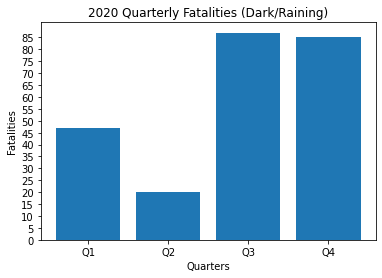

In [36]:
new_var = year_2020.groupby(['QUARTER','INJ_SEVER_CODE','LIGHT_DESC']).filter(lambda x: (x["WEATHER_DESC"] == "Raining").any() and (x["INJ_SEVER_CODE"] == 5.0).any() and (x["LIGHT_DESC"] != 'Daylight').any())
new_var = new_var.groupby(['QUARTER','INJ_SEVER_CODE','LIGHT_DESC']).size().sort_values(ascending = True)


Q1_dark = new_var['Q1'][5.0]["Dark No Lights"] + new_var['Q1'][5.0]["Dark Lights On"]
Q2_dark = new_var['Q2'][5.0]["Dark Lights On"]
Q3_dark = new_var['Q3'][5.0]["Dark No Lights"] + new_var['Q3'][5.0]["Dark Lights On"]
Q4_dark = new_var['Q4'][5.0]["Dark No Lights"] + new_var['Q4'][5.0]["Dark Lights On"]

data = [['Q1', Q1_dark ],['Q2', Q2_dark ], ['Q3', Q3_dark ], ['Q4', Q4_dark ]]

new_df = pd.DataFrame(data, columns = ['Quarter', 'Fatalities'])

plt.bar(new_df.Quarter.values,new_df.Fatalities.values)
plt.xlabel('Quarters')
plt.ylabel('Fatalities')
plt.title('2020 Quarterly Fatalities (Dark/Raining)')
plt.yticks(np.arange(0,max(new_df.Fatalities.values),5))

plt.show()

# **Insight Summary**

**Location Analysis**

The counties where there was more rainfall had more crashes, a clear indication of how weather in this rain has an impact on crashes.

**Minimum and maximum speedlimit for crashes**

We would in general think that most crashes happen under high speeds but it is interesting to note that it is not always the case.

**Crashes distribution on weather**

Adding to the location analysis, in maryland as a whole there were more crashes when the weather was "raining" and least when it was "Blow sand soil, dirt"

**Quaterly Analysis of Crashes under rain**



*   Q1 2020, Q2 2020, and Q3 2020 were close in terms of total number of accidents
*   Q2 2020 was very low compared to the other 3 quarters (probably due to th pandemic)

*   Q4 2020 was missing since the year hasn't ended yet, and they publish the data once it ends
 










**Quarterly Analysis of Accidents in Rainy Weather**
*   Q1 2020 had much more rain accidents than the other 3 quarters
*   Q1 2020 should have more fatalities than the other 3 quarters in 2020 correct?



**Fatalities when the condition is "Raining" in each quarters for the year 2020**



*   Q3 and Q4 2020 had much more fatalities than Q1 2020
*   Although Q1 2020 had much more accidents in the rain, Q3 and Q4 2020 had way more fatalities
*   Could another attribute in the table have an impact on fatalities?





**Quarterly Fatalities when the condition is Raining and Night time in 2020**
*   Q3 and Q4 2020 much higher than Q1 2020 once again
*   Raining and Night time pattern the same as the fatality table, meaning that rain and night time driving go hand in hand
*   Two dangerous conditions making fatalities rise is a problem, needs to be adressed





# **Reasoning and Conclusion**




*   Pandemic's influence on total number of accident reports.
*   Maryland's dominant weather under crashes being rain.


*   Rainy weather is not an outright cause for driving related deaths.
*   Rainy weather's lethality when paired with driving at night.

*   Possible influence from summer break in Q3.
*   Possible influence from the holidays (Halloween, Thanksgiving, Christmas) in Q4.








